# Исследование надежности заемщиков


**Краткое описание проеката**


Заказ исследования от кредитного отдела банка, для использования резултата в построении системы оценки способности потенциального заёмщика вернуть кредит банку.

**Цель проекта**

Подтвердить или опровергнуть взаимосвязь семейного положения и количества детей с фактом погашением кредита в срок.

**Описание данных**

Входные данные от банка — статистика о платёжеспособности клиентов.

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

**План работы**

* Просмотр и изучение данных.
* Предобработка данных.
* Исследование данных и ответы на вопросы.
* Общий вывод.

## Открытие таблицы и ознакомление с данными


In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [ ]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Количество пропущенных значений для каждого столбца

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Столбец total_income хранит информацию о доходах, и т.к. на сумму доходов больше всего влияет тип занятости - заполним пропуски медианным значением по каждому типу из столбца income_type:


In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

Заменим все отрицательные значения days_employed положительными:

In [7]:
data['days_employed'] = data['days_employed'].abs()

Медианное значение трудового стажа для каждого типа занятости в днях:


In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов "безработные" и "пенсионеры" наблюдаются аномально высокие значения, но мы будем игнорировать эти выбросы ввиду отсутствия потребностей их для исследования


**Уникальные значения children:**


In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Удаление аномальных значений из dataframe**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Проверка:

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

Заполним пропуски в days_employed медианным значением по каждому типу занятости

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

 Проверка:

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных


**Замена типа данных в total_income**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов


Обработка неявных дубликатов в столбце 'education', для предотвращения ошибок из-за разного регистра

In [15]:
data['education'] = data['education'].str.lower()


Вывод количества строк дубликатов:

In [16]:
data.duplicated().sum()

71

Удаление дублей:

In [17]:
data = data.drop_duplicates()

### Категоризация данных


Создание столбца с категориями доходов - total_income_category 

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.




In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)


Перечень уникальных целей взятия кредита из столбца 'purpose'

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об


Катекоризация целевого кредитования по следующим направлениям:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.


In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследование данных

#### Зависимость между количеством детей и возвратом кредита в банк:


In [34]:
pvt_сhildren = data.pivot_table(index = 'children', values = 'debt', aggfunc = [len, sum, 'mean'])
pvt_сhildren['mean'] = pvt_сhildren['mean'] *100
pvt_сhildren
# len - показывает общее количество заёмщиков в каждой из категорий
# sum - суммирует все единицы возвращая количество должников в каждой категории
# mean * 100 - выводит процнт задолжников для каждой из категорий

,len,sum,mean
,debt,debt,debt
children,,,
0,14091,1063,7.543822
1,4808,444,9.234609
2,2052,194,9.454191
3,330,27,8.181818
4,41,4,9.756098
5,9,0,0.000000


<AxesSubplot:ylabel='children'>

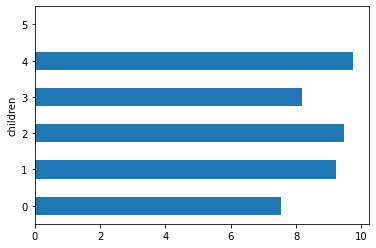

In [33]:
children_group = data.groupby('children')['debt'].mean()

(children_group*100).plot(kind = 'barh')

# группируем данные по среднему % 'должников' в каждой категории
# строим столбчатую диаграмму

**Вывод:** Основываясь на данных можно утверждать:
*    Явное уменьшение вероятности возврата кредита в срок для клиента с детьми, относительно клиента без детей. 
*    Нечёткое, ~линейное~ уменьшение вероятности погасить кредит в срок, пропорционально увеличению количества детей. 


#### Зависимость семейногого положения и возврата кредита в срок

In [42]:
pvt_family = data.pivot_table(index = 'family_status', values = 'debt', aggfunc = [len, sum, 'mean'])
pvt_family['mean'] = pvt_family['mean']*100
pvt_family
# len - показывает общее количество заёмщиков в каждой из категорий
# sum - суммирует все единицы возвращая количество должников в каждой категории
# mean * 100 - выводит процнт задолжников для каждой из категорий

,len,sum,mean
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,9.763948
в разводе,1189,84,7.064760
вдовец / вдова,951,63,6.624606
гражданский брак,4134,385,9.313014
женат / замужем,12261,927,7.560558


<AxesSubplot:ylabel='family_status'>

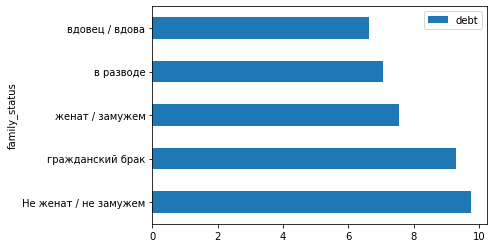

In [49]:
family_group = data.groupby('family_status').mean()[['debt']]
family_group_sort = family_group.sort_values(by = 'debt', ascending = False)
(family_group_sort*100).plot(kind = 'barh')
# группируем данные по среднему % 'должников' в каждой категории
# строим столбчатую диаграмму

**Вывод:** Сравнение статистики по семейному положению показало следующее влияние:
* Не женатые\ Не замужем и клиенты в гражданском браке, по убывающей, больее всего склонны к задолжности возврата кредита.
* Женатые\замужем, клиенты находящиеся в разводе и вдовы\вдовцы, по возрастающей, наименее склонны к задолжности.


#### Зависимость между уровнем дохода и возвратом кредита в срок

In [53]:
pvt_ti_category = data.pivot_table(index = 'total_income_category', values = 'debt', aggfunc = [len, sum, 'mean'])
pvt_ti_category['mean'] = pvt_ti_category['mean']*100
pvt_ti_category
# len - показывает общее количество заёмщиков в каждой из категорий
# sum - суммирует все единицы возвращая количество должников в каждой категории
# mean * 100 - выводит процнт задолжников для каждой из категорий

,len,sum,mean
,debt,debt,debt
total_income_category,,,
A,25,2,8.000000
B,5014,354,7.060231
C,15921,1353,8.498210
D,349,21,6.017192
E,22,2,9.090909


In [73]:
pvt_ti_category.iloc[1:3] # срез значимых категорий

,len,sum,mean
,debt,debt,debt
total_income_category,,,
B,5014,354,7.060231
C,15921,1353,8.498210


<AxesSubplot:ylabel='total_income_category'>

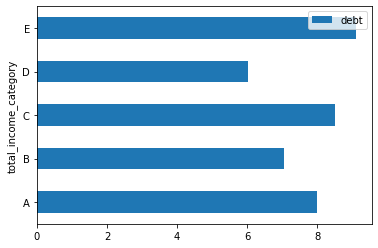

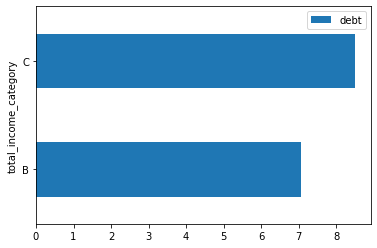

In [74]:
ti_category_group = data.groupby('total_income_category').mean()[['debt']]
(ti_category_group*100).plot(kind = 'barh')
# группируем данные по среднему % 'должников' в каждой категории
# строим столбчатую диаграмму
(ti_category_group[1:3]*100).plot(kind = 'barh')
# сравнение графика % должников у значимых категорий

**Вывод** Сравнение уровня дохода по частоте возникновения задолженности показательно в категориях 'B' (200001 - 1000000 ) и 'C' (50001 - 200000) , берущих на себя более 90% всех выдаваемых кредитов.
* Клиенты, уровень дохода которых, находится в категории 'C' более склонны становиться должниками, отличии от клиентов c категорией дохода 'B'.

~**Вывод:** Сравнение уровней дохода по частоте возникновения задолженности позволяет сделать вывод:~
~* Наименьший шанс возникновения задолжнности возникает у клиентов c категорией дохода D (30001–50000 )~
~* Наибольший шанс возникновения задолжнности возникает у клиентов с категорией дохода E (до 30000)~

~* Также на участке категорий A, B, C - B(200001–1000000) показывает наименьший риск задолжностей относительно A и С~


#### Как разные цели кредита влияют на его возврат в срок?

In [63]:
pvt_purpose_cat = data.pivot_table(index = 'purpose_category', values = 'debt', aggfunc = [len, sum, 'mean'])
pvt_purpose_cat['mean'] = pvt_purpose_cat['mean']*100
pvt_purpose_cat
# len - показывает общее количество заёмщиков в каждой из категорий
# sum - суммирует все единицы возвращая количество должников в каждой категории
# mean * 100 - выводит процнт задолжников для каждой из категорий

,len,sum,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4279,400,9.347978
операции с недвижимостью,10751,780,7.255139
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803


<AxesSubplot:ylabel='purpose_category'>

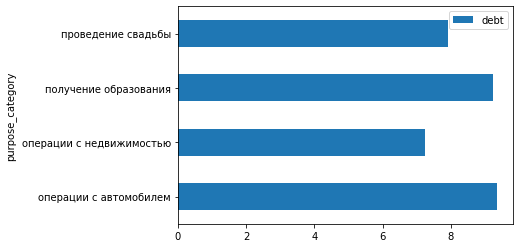

In [66]:
purpose_cat_group = data.groupby('purpose_category').mean()[['debt']]
(purpose_cat_group*100).plot(kind = 'barh')
# группируем данные по среднему % 'должников' в каждой категории
# строим столбчатую диаграмму

**Вывод:** На возврат кредита в срок:
* Самыми большими рисками возникновения задолжностей обладают операции с автомобилями и получение образования.
* Более и наиболее стабильными себя показывают - проведение свадеиб и операции с недвижимостью.

#### Возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски всегда встречаются параллельно в одних и тех-же строках, в значениях days_employed и  total_income. Они не являются логически связанными с другими столбцами и, скорее, являются случайными ошибками выгрузки данных. Причину таких пропусков стоило бы уточнить у персонала, ответственного за сбор и передачу данных.  
* Созависимость с пропуском в другом столбце.
* Независимость от других значений и заинтересованности клиента в непредоставлении данных.

#### Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных?

*Ответ:*
Медианное значение выбиралось для каждого типа зароботка отдельно и являлось наиболее показательным значением для этих переменных, в каждой из которых, присутствует маленькая выборка значений с большим вкладом в общий объём, сильно смещающая среднее.

### Шаг 4: общий вывод.

**Итог запрошенного исследования:**


По заказу кредитного отдела банка была проверена зависимость погашения кредита в срок от семейного положения и количества детей клиента.
1.  Погашение кредита в срок зависит от количества детей клиента.
* Наличие детей прямым образом влияет на увеличение риска возникновения задолженостей, относительно клиентов без детей.
* С увеличением количества детей, по стремящемуся к линейному графику, возрастает риск возниконовения задолженостей.

2.  Факт погашения кредита в срок имеет зависимость с семеным положением. По убыванию риска:
* Не женатые\Не замужем ; Гражданский брак ; Женат\Замужем ; В разводе ; Вдовец\Вдова.
* Клиенты состоящие в Гражданском браке и в статусе Не женат\ Не замужем - обладают значительным риском возникновения задолжености относительно остальных категорий.


**Дополнительная информация по исследованию**

3. В ходе исследования была выявлена зависимость риска возникновения задолженость от целей кредита где:
* Большим риском возникновения задолженности обладают: Операции с автомобилем и Получение образования.
* Меньшим риском возникновения задолжености, по убыванию риска: Проведение свадьбы и Операции с недвижимостью.

~4. В зависимости между уровнем дохода были выявлены лидеры по рискам возникновения задолженности:~
~* Наибольший риск возникновения задолжнеости у группы клиентов с заработком E( до 30000).~
~* Наименьший риск возникновения задолжености у группы клиентов с заработком D( от 30001 до 50000).~

4. Ислледование рисков относительно категорий уровня дохода клиента выявило две показательные, относительно остальных, категории('В' & 'C') основываясь на которых:
* Клиенты с уровнем дохода в категории 'С' более подвержены риску возникновения задолжностей, чем клиенты с уровнем дохода в категории 'B'

**Комментарий к проведённой работе**

* Основываясь на дополнительной информации по зависимости рисков от Целей кредита и Уровня дохода клиента, рекомендуется внесение их в качестве весов для программы Кредитного скоринга.